# SUPER MARKET SALE ANALYSIS USING PYTHON

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

In [28]:
df = pd.read_csv("C:/Users/Sonam/Desktop/supermarket_sales - Sheet1(1).csv")


In [29]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
df_1=df.drop(columns='gross margin percentage')

In [31]:
#To find out the number of duplicates in the dataset and we see there are no duplicates
df.duplicated().sum()

0

In [32]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

* There are no na values in this dataset

In [33]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [34]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [35]:
#1 The total number of items bought by the customers
px.histogram(data_frame=df,
             x='Product line',
             color='Gender',
             template='plotly_dark',
             color_discrete_map={
                 'Female':'#f0f921',
                 'Male':'#7201a8'
             },
             barmode='group',
            title="Items bought")

* This graph represents the total number of products bought by the respective genders -
---

In [36]:
#2 Finding the total number of customrs belonging to the particular type 
px.histogram(data_frame=df,
             x='Customer type',
             color='Gender',
             template='plotly_dark',
             color_discrete_map={
                 'Female':'#9c179e',
                 'Male':'orange'
             },
             opacity=1,
             barmode='group',
             title="Type of customers"
            )

* This graph represents the total number of members i.e whether the particular gender has merbership or not so the relation of both has been plotted above.
---

In [37]:
#3 Gender distribution with respect to the cities they have purchased the product from
px.histogram(data_frame=df,
             x='Product line',
             color='City',
             template='plotly_dark',
             color_discrete_map={
                 'Yangon':'#7201a8',
                 'Naypyitaw':'#9c179e',
                 'Mandalay':'#fdca26'
                 
             },
             opacity=1,
             barmode='group',
             title="Type of products purchased from cities"
            )

In [38]:
#4 The type of product that is popular in the particular city
px.histogram(data_frame=df,
             x='City',
             color='Gender',
             template='plotly_dark',
             color_discrete_map={
                 'Female':'#7201a8',
                 'Male':'orange'
             },
             opacity=1,
             barmode='group',
             title="Citywise distribution"
            )

In [39]:
#5 Plotting the relation with the unit price with the income
df.select_dtypes('float64')

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...
995,40.35,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [40]:
df_1.select_dtypes('float64').corr()

,Unit price,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.633962,0.633962,0.633962,0.633962,-0.008778
Tax 5%,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


In [41]:
#6
px.imshow(df_1.select_dtypes('float64').corr())

In [42]:
#7 Finding the relation of unit price with rating
px.scatter(data_frame=df,x='Rating',
           y='Unit price',
           template='plotly_dark',
           trendline="ols",
           marginal_x='histogram',
           marginal_y='histogram',
           title = "Relation of rating with Up")

* From the graph we see that there isin't much relation as such between the unit price and rating we can't say much about the relation but from the correlation plot we can see that the rating and unit price have a weak negative correlation.
---

In [43]:
#People in what city prefer whci kind of payment
df_3=pd.crosstab(df['City'],df['Payment'])

In [44]:
df.groupby('City')['Payment'].count()

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Payment, dtype: int64

In [45]:
df_3.iloc[0:3]

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


In [46]:
#8 People in what city prefer whci kind of payment
px.histogram(data_frame=df,
             x='City',
             color='Payment',
             barmode='group',
             color_discrete_map={
                 'Ewallet':'light green',
                 'Cash':'indigo',
                 'Credit card':'light blue'
             },
             template ='plotly_dark',
             title = "Cities with payment method"
            )

In [47]:
#9 Average rating given by male or female
px.bar(data_frame=pd.DataFrame(df.groupby(['Product line','Gender'])['Rating'].mean()).reset_index(),
       x='Product line',
       y='Rating',
       color='Gender',
       template='plotly_dark',
       barmode='group',
       title = 'Mean ratings by Gender')

* This graph represents the avearage rating that is given by the male and female 
---

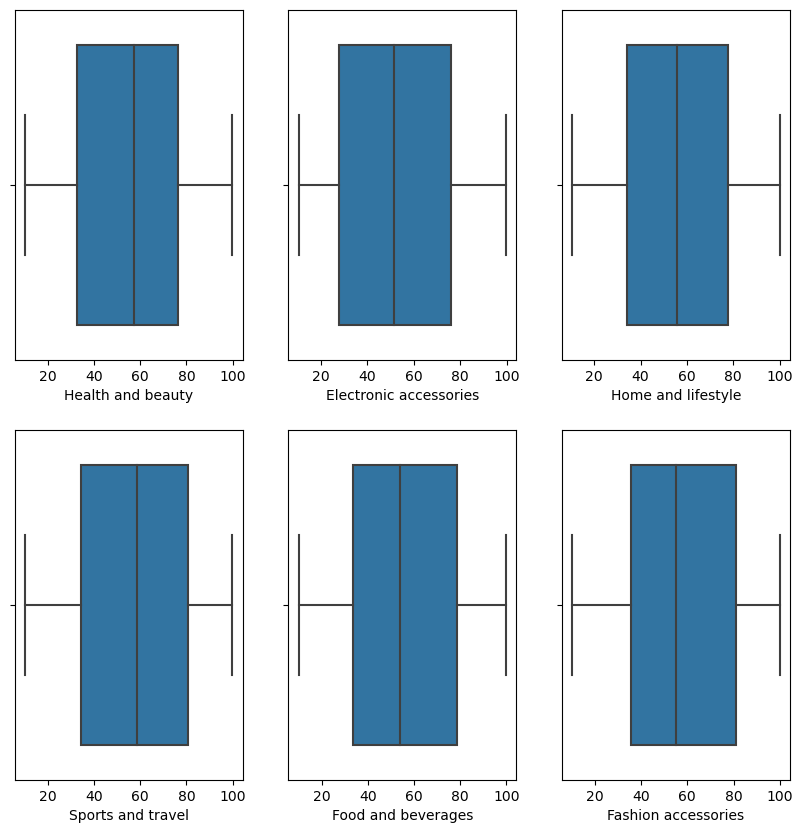

In [48]:
#10 Average unti price of the products belonging to some category
plt.figure(figsize=(10,10))
for i,j in enumerate(df['Product line'].unique()):   
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df[df['Product line'] == j],x='Unit price')
    plt.xlabel(j)

* Here we see that there aren't any outliers when it comes to the unit prices of any product line
---

In [49]:
#11 Average rating of the product according the city where that product has been purchased
px.bar(data_frame=pd.DataFrame(df.groupby(['Product line','City'])[('Rating')].mean()).reset_index(),
       x='Product line',
       y='Rating',
       color='City',
       barmode='group',
       template='plotly_dark',
       color_discrete_map={
           'Mandalav':'violet',
           'Naypyitaw':'indigo',
           'Yangon':'orange'
       } )

* Here we see the average rating received by the product in the respective cities where that particular product was purchased and the rating almost lies in between 6 - 7 for each and every product line.
---

In [50]:
#12 Average rating given by the gender as per the city
px.bar(data_frame=pd.DataFrame(df.groupby(['City','Gender'])[('Rating')].mean()).reset_index(),
       x='City',
       y='Rating',
       color='Gender',
       barmode='group',
       template='plotly_dark',
       color_discrete_map={
           'Male':'indigo',
           'Female':'orange'
       } )

* This graph represents the averge rating that has been given by the gender who has brought the product from that city.
* In city Yangon - The average rating given by male is - 7.19
---

In [51]:
#13 Average unit price of the product line 
px.bar(data_frame=pd.DataFrame(df.groupby(['Product line','City'])['Unit price'].mean()).reset_index(),
       x='Product line',
       y='Unit price',
       color='City',
       template = 'plotly_dark',
      barmode = 'group',
      opacity=0.9)

* Here we see that average prices of the product line with respect to the cities where that particular product has been brought
---

In [52]:
#14 Demand of each and evry product according to quantity as per the city
px.bar(data_frame=df,
      x='Product line',
      y='Quantity',
      color='City',
      template='plotly_dark',
      barmode='group')

* People staying in Yangon prefer Home and lifestyle products while people staying in Naypyitaw prefer Food and Beverages
---

In [53]:
#15 Demand of each and every product according to quantity as per the Gender
px.bar(data_frame=df,
      x='Product line',
      y='Quantity',
      color='Gender',
      template='plotly_dark',
      barmode='group')

* In case of Home and lifestyle , Food and beverages , Fashion accessories and Sports and travel the demand is more for the females as compared to males